In [157]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import scipy.stats as sps


sns.set()

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

foo = soup.findAll('div',{'class' : 'tab-content'})
print (len(foo))

the_div = foo[2]

tbody = the_div.tbody

rows = tbody.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]
    
cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols

df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc','confirmed_per_M']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc','confirmed_per_M']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)
df['dead_pct'] = 100 * df['dead'] / df['confirmed']
df['dead'] = df['dead'].fillna(0)

df.head(40)

3


,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct
China,80967.0,80928.0,39.0,1.000482,3248.0,3.0,71150.0,6569.0,2136.0,56.0,4.011511
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015
Iran,19644.0,18407.0,1237.0,1.067203,1433.0,149.0,5979.0,12232.0,NaN,234.0,7.294848
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646
USA,14366.0,13789.0,577.0,1.041845,217.0,10.0,125.0,14024.0,64.0,43.0,1.510511
France,10995.0,NaN,NaN,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0,3.383356
S. Korea,8652.0,8565.0,87.0,1.010158,94.0,3.0,2233.0,6325.0,59.0,169.0,1.086454
Switzerland,4898.0,4222.0,676.0,1.160114,43.0,NaN,15.0,4840.0,NaN,566.0,0.877909
UK,3269.0,NaN,NaN,NaN,144.0,NaN,65.0,3060.0,20.0,48.0,4.405017


In [158]:
df.sum()


confirmed          252731.000000
yesterday          179168.000000
inc                  7837.000000
factor                112.253720
dead                10405.000000
dead_inc              377.000000
recovered           89056.000000
active_cases       153270.000000
serious              7451.000000
confirmed_per_M     19176.890000
dead_pct              365.116993
dtype: float64

In [159]:
today = pd.to_datetime('today').strftime('%Y-%m-%d %H:%M:%S')
file_prefix = 'snapshots/corona_snapshot_'
filename = file_prefix + today.replace(' ','_').replace(':','_') + '.pkl'
df['datetime'] = [today] * len(df)
df.set_index([df.index,'datetime'],drop=True).to_pickle(filename)
df.head()

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80967.0,80928.0,39.0,1.000482,3248.0,3.0,71150.0,6569.0,2136.0,56.0,4.011511,2020-03-20 12:29:59
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
Iran,19644.0,18407.0,1237.0,1.067203,1433.0,149.0,5979.0,12232.0,NaN,234.0,7.294848,2020-03-20 12:29:59
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646,2020-03-20 12:29:59


In [ ]:
import glob
files = [f for f in glob.glob('./' + file_prefix +'*')]

timeline_df = pd.DataFrame()

for f in files:
    temp = pd.read_pickle(f)
    timeline_df = pd.concat([timeline_df,temp],axis=0)
    
timeline_df.sort_index(inplace=True)
timeline_df['dead'] = timeline_df['dead'].fillna(0)
timeline_df

In [161]:
timeline_group = timeline_df.groupby(level=0)

a_country = timeline_group.get_group('USA')
a_country

confirmed  yesterday     inc    factor   dead  \
    datetime                                                             
USA 2020-03-15 15:50:08     3083.0     2943.0   140.0  1.047571   60.0   
    2020-03-15 16:55:44     3094.0     2943.0   151.0  1.051308   62.0   
    2020-03-15 19:43:02     3326.0     2943.0   383.0  1.130139   63.0   
    2020-03-15 21:46:07     3457.0     2943.0   514.0  1.174652   63.0   
    2020-03-15 22:21:09     3621.0     2943.0   678.0  1.230377   63.0   
...                            ...        ...     ...       ...    ...   
    2020-03-19 21:52:01    11780.0     9259.0  2521.0  1.272276  176.0   
    2020-03-20 08:07:14    14366.0    13789.0   577.0  1.041845  217.0   
    2020-03-20 10:52:14    14366.0    13789.0   577.0  1.041845  217.0   
    2020-03-20 11:14:47    14366.0    13789.0   577.0  1.041845  217.0   
    2020-03-20 12:29:59    14366.0    13789.0   577.0  1.041845  217.0   

                         dead_inc  recovered  active_cases  serious  \
    datetime                                                          
USA 2020-03-15 15:50:08       3.0       56.0        2967.0     10.0   
    2020-03-15 16:55:44       5.0       56.0        2976.0     10.0   
    2020-03-15 19:43:02       6.0       59.0        3204.0     10.0   
    2020-03-15 21:46:07       6.0       59.0        3335.0     10.0   
    2020-03-15 22:21:09       6.0       59.0        3499.0     10.0   
...                           ...        ...           ...      ...   
    2020-03-19 21:52:01      26.0      108.0       11496.0     64.0   
    2020-03-20 08:07:14      10.0      125.0       14024.0     64.0   
    2020-03-20 10:52:14      10.0      125.0       14024.0     64.0   
    2020-03-20 11:14:47      10.0      125.0       14024.0     64.0   
    2020-03-20 12:29:59      10.0      125.0       14024.0     64.0   

                         confirmed_per_M  dead_pct  
    datetime                                        
USA 2020-03-15 15:50:08              9.3  1.946156  
    2020-03-15 16:55:44              9.3  2.003878  
    2020-03-15 19:43:02             10.0  1.894167  
    2020-03-15 21:46:07             10.4  1.822389  
    2020-03-15 22:21:09             10.9  1.739851  
...                                  ...       ...  
    2020-03-19 21:52:01             36.0  1.494058  
    2020-03-20 08:07:14             43.0  1.510511  
    2020-03-20 10:52:14             43.0  1.510511  
    2020-03-20 11:14:47             43.0  1.510511  
    2020-03-20 12:29:59             43.0  1.510511  

[82 rows x 11 columns]

In [162]:
non_duplicates = ( ( a_country['confirmed'] != a_country['confirmed'].shift() )  | (
    a_country['dead'] != a_country['dead'].shift()))

a_country = a_country[non_duplicates]
a_country

confirmed  yesterday     inc    factor   dead  \
    datetime                                                             
USA 2020-03-15 15:50:08     3083.0     2943.0   140.0  1.047571   60.0   
    2020-03-15 16:55:44     3094.0     2943.0   151.0  1.051308   62.0   
    2020-03-15 19:43:02     3326.0     2943.0   383.0  1.130139   63.0   
    2020-03-15 21:46:07     3457.0     2943.0   514.0  1.174652   63.0   
    2020-03-15 22:21:09     3621.0     2943.0   678.0  1.230377   63.0   
    2020-03-15 23:37:02     3557.0     2943.0   614.0  1.208631   68.0   
    2020-03-16 08:41:58     3782.0     3680.0   102.0  1.027717   69.0   
    2020-03-16 10:29:44     3802.0     3680.0   122.0  1.033152   69.0   
    2020-03-16 14:09:44     3806.0     3680.0   126.0  1.034239   69.0   
    2020-03-16 14:22:25     3807.0     3680.0   127.0  1.034511   69.0   
    2020-03-16 16:04:29     3814.0     3680.0   134.0  1.036413   70.0   
    2020-03-16 16:35:41     3837.0     3680.0   157.0  1.042663   70.0   
    2020-03-16 16:54:13     4040.0     3680.0   360.0  1.097826   70.0   
    2020-03-16 18:13:22     4108.0     3680.0   428.0  1.116304   71.0   
    2020-03-16 19:48:19     4186.0     3680.0   506.0  1.137500   73.0   
    2020-03-16 20:35:05     4252.0     3680.0   572.0  1.155435   75.0   
    2020-03-16 21:44:20     4334.0     3680.0   654.0  1.177717   77.0   
    2020-03-16 22:22:56     4430.0     3680.0   750.0  1.203804   77.0   
    2020-03-17 09:27:40     4736.0     4663.0    73.0  1.015655   93.0   
    2020-03-17 10:40:22     4743.0     4663.0    80.0  1.017156   93.0   
    2020-03-17 13:58:53     4744.0     4663.0    81.0  1.017371   93.0   
    2020-03-17 15:16:49     4748.0     4663.0    85.0  1.018229   93.0   
    2020-03-17 16:41:28     5243.0     4663.0   580.0  1.124383   94.0   
    2020-03-17 17:36:32     5672.0     4663.0  1009.0  1.216384   96.0   
    2020-03-17 17:46:33     5686.0     4663.0  1023.0  1.219387   97.0   
    2020-03-17 18:08:54     5696.0     4663.0  1033.0  1.221531   97.0   
    2020-03-17 19:52:34     5723.0     4663.0  1060.0  1.227321   97.0   
    2020-03-17 19:59:11     5839.0     4663.0  1176.0  1.252198   99.0   
    2020-03-17 20:02:26     5863.0     4663.0  1200.0  1.257345   99.0   
    2020-03-17 21:11:09     5917.0     4663.0  1254.0  1.268926   99.0   
    2020-03-17 21:30:03     5921.0     4663.0  1258.0  1.269783  100.0   
    2020-03-17 22:36:48     6176.0     4663.0  1513.0  1.324469  102.0   
    2020-03-17 23:06:02     6223.0     4663.0  1560.0  1.334549  103.0   
    2020-03-18 08:14:14     6524.0     6411.0   113.0  1.017626  116.0   
    2020-03-18 14:08:55     6534.0     6411.0   123.0  1.019186  116.0   
    2020-03-18 16:05:48     7387.0     6411.0   976.0  1.152238  116.0   
    2020-03-18 16:55:09     7411.0     6411.0  1000.0  1.155982  116.0   
    2020-03-18 18:51:01     7687.0     6411.0  1276.0  1.199033  117.0   
    2020-03-18 19:25:33     7708.0     6411.0  1297.0  1.202309  120.0   
    2020-03-18 19:37:13     7754.0     6411.0  1343.0  1.209484  122.0   
    2020-03-18 19:43:21     8019.0     6411.0  1608.0  1.250819  124.0   
    2020-03-18 20:54:00     8020.0     6411.0  1609.0  1.250975  125.0   
    2020-03-18 21:13:22     8042.0     6411.0  1631.0  1.254406  127.0   
    2020-03-18 22:46:16     8442.0     6411.0  2031.0  1.316799  149.0   
    2020-03-19 00:06:40     9235.0     6411.0  2824.0  1.440493  150.0   
    2020-03-19 10:03:05     9464.0     9259.0   205.0  1.022141  155.0   
    2020-03-19 15:35:27     9521.0     9259.0   262.0  1.028297  159.0   
    2020-03-19 16:14:24     9521.0     9259.0   262.0  1.028297  160.0   
    2020-03-19 19:26:34    11355.0     9259.0  2096.0  1.226374  171.0   
    2020-03-19 20:48:34    11597.0     9259.0  2338.0  1.252511  171.0   
    2020-03-19 21:36:39    11780.0     9259.0  2521.0  1.272276  176.0   
    2020-03-20 08:07:14    14366.0    13789.0   577.0  1.041845  217.0   

                         dea

In [163]:
resample = a_country.droplevel(0)
resample.index = pd.DatetimeIndex(resample.index)
resample = resample.resample('180T').bfill()
index = pd.to_datetime(resample.index)

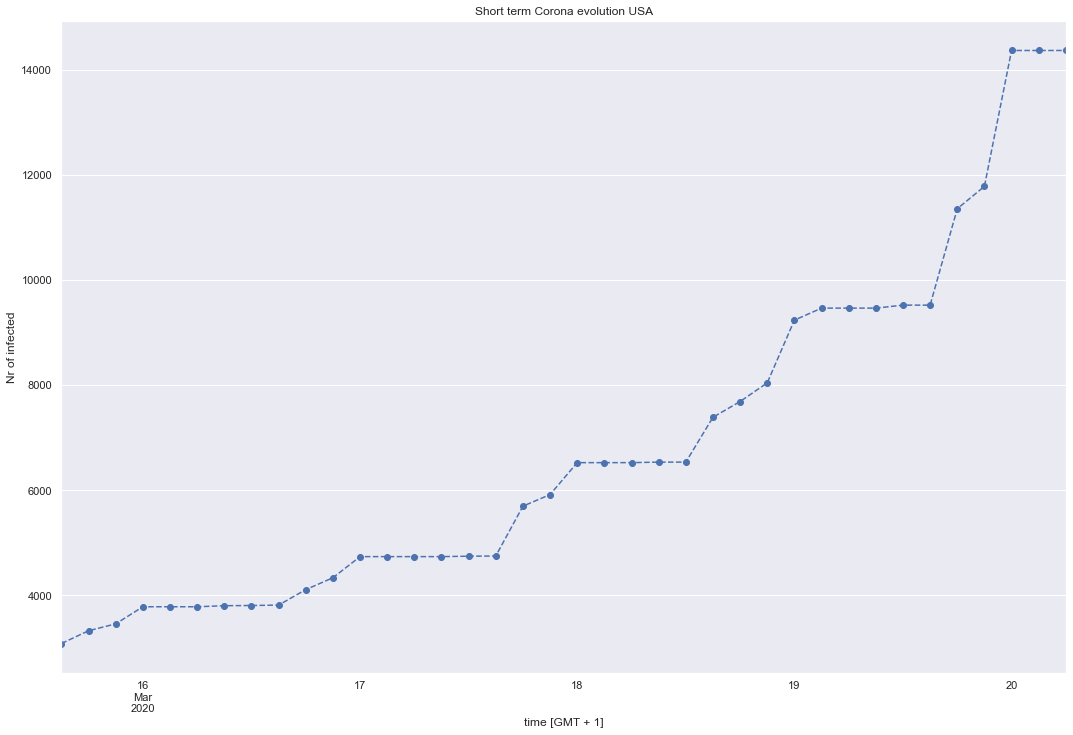

In [164]:


plt.figure(figsize=(18,12))
plt.title('Short term Corona evolution {}'.format(a_country.index[0][0]))
resample['confirmed'].plot(style ='o--')
#plt.xticks(rotation=90)
#plt.xticks(np.arange(len(index)),index.values)
plt.xlabel('time [GMT + 1]')

plt.ylabel('Nr of infected')
#plt.ylabel(r'Nr of infected [ $10^{x}$ ]')
#plt.yscale('log')

filename = 'corona_short_term_' + a_country.index[0][0] + '.jpg'
plt.savefig (filename,format='jpg')


In [165]:
top_dead_pct = df.loc[df['confirmed'] > 500].sort_values('dead_pct',ascending=False)
top_dead_pct

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Iran,19644.0,18407.0,1237.0,1.067203,1433.0,149.0,5979.0,12232.0,NaN,234.0,7.294848,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
UK,3269.0,NaN,NaN,NaN,144.0,NaN,65.0,3060.0,20.0,48.0,4.405017,2020-03-20 12:29:59
China,80967.0,80928.0,39.0,1.000482,3248.0,3.0,71150.0,6569.0,2136.0,56.0,4.011511,2020-03-20 12:29:59
Japan,963.0,943.0,20.0,1.021209,33.0,NaN,215.0,715.0,50.0,8.0,3.426791,2020-03-20 12:29:59
France,10995.0,NaN,NaN,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0,3.383356,2020-03-20 12:29:59
Netherlands,2460.0,NaN,NaN,NaN,76.0,NaN,2.0,2382.0,45.0,144.0,3.089431,2020-03-20 12:29:59
Belgium,2257.0,1795.0,462.0,1.257382,37.0,16.0,204.0,2016.0,164.0,195.0,1.639344,2020-03-20 12:29:59
USA,14366.0,13789.0,577.0,1.041845,217.0,10.0,125.0,14024.0,64.0,43.0,1.510511,2020-03-20 12:29:59


In [166]:
country_names = sorted(df.index.values)
#country_names

In [167]:
df.loc[df['confirmed'] > 500 ].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Belgium,2257.0,1795.0,462.0,1.257382,37.0,16.0,204.0,2016.0,164.0,195.0,1.639344,2020-03-20 12:29:59
Switzerland,4898.0,4222.0,676.0,1.160114,43.0,NaN,15.0,4840.0,NaN,566.0,0.877909,2020-03-20 12:29:59
Australia,876.0,756.0,120.0,1.158730,7.0,NaN,46.0,823.0,2.0,34.0,0.799087,2020-03-20 12:29:59
Malaysia,1030.0,900.0,130.0,1.144444,2.0,NaN,87.0,941.0,26.0,32.0,0.194175,2020-03-20 12:29:59
Czechia,774.0,694.0,80.0,1.115274,0.0,NaN,3.0,771.0,6.0,72.0,NaN,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646,2020-03-20 12:29:59
Iran,19644.0,18407.0,1237.0,1.067203,1433.0,149.0,5979.0,12232.0,NaN,234.0,7.294848,2020-03-20 12:29:59
Denmark,1226.0,1151.0,75.0,1.065161,9.0,3.0,1.0,1216.0,30.0,212.0,0.734095,2020-03-20 12:29:59
USA,14366.0,13789.0,577.0,1.041845,217.0,10.0,125.0,14024.0,64.0,43.0,1.510511,2020-03-20 12:29:59


In [168]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
San Marino,144.0,NaN,NaN,NaN,14.0,NaN,4.0,126.0,12.0,4244.0,9.722222,2020-03-20 12:29:59
Faeroe Islands,80.0,72.0,8.0,1.111111,0.0,NaN,3.0,77.0,NaN,1637.0,NaN,2020-03-20 12:29:59
Vatican City,1.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,1248.0,NaN,2020-03-20 12:29:59
Iceland,409.0,330.0,79.0,1.239394,0.0,NaN,5.0,404.0,1.0,1199.0,NaN,2020-03-20 12:29:59
Andorra,75.0,74.0,1.0,1.013514,0.0,NaN,1.0,74.0,2.0,971.0,NaN,2020-03-20 12:29:59
Luxembourg,484.0,335.0,149.0,1.444776,4.0,NaN,6.0,474.0,1.0,773.0,0.826446,2020-03-20 12:29:59
Liechtenstein,28.0,NaN,NaN,NaN,0.0,NaN,NaN,28.0,NaN,734.0,NaN,2020-03-20 12:29:59
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Switzerland,4898.0,4222.0,676.0,1.160114,43.0,NaN,15.0,4840.0,NaN,566.0,0.877909,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59


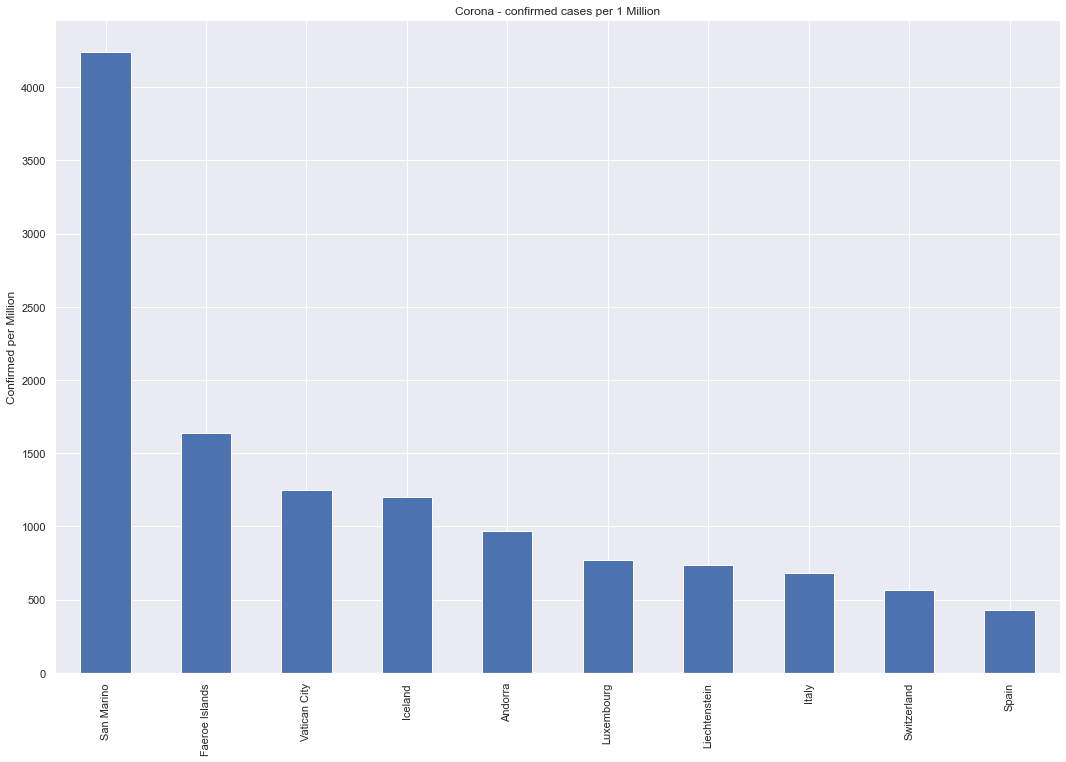

In [169]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [170]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M','dead_pct','datetime'],inplace=True)
totals

,totals
confirmed,252731
yesterday,179168
inc,7837
dead,10405
dead_inc,377
recovered,89056
active_cases,153270
serious,7451


In [171]:
country_names = list(sorted((df.index.unique().values)))
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'CAR',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'DRC',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guya

In [172]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland','Taiwan','Estonia','Germany','Austria','Belgium','France','Canada','Japan']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80967.0,80928.0,39.0,1.000482,3248.0,3.0,71150.0,6569.0,2136.0,56.0,4.011511,2020-03-20 12:29:59
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646,2020-03-20 12:29:59
USA,14366.0,13789.0,577.0,1.041845,217.0,10.0,125.0,14024.0,64.0,43.0,1.510511,2020-03-20 12:29:59
France,10995.0,NaN,NaN,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0,3.383356,2020-03-20 12:29:59
S. Korea,8652.0,8565.0,87.0,1.010158,94.0,3.0,2233.0,6325.0,59.0,169.0,1.086454,2020-03-20 12:29:59
Belgium,2257.0,1795.0,462.0,1.257382,37.0,16.0,204.0,2016.0,164.0,195.0,1.639344,2020-03-20 12:29:59
Austria,2203.0,2179.0,24.0,1.011014,6.0,NaN,9.0,2188.0,13.0,245.0,0.272356,2020-03-20 12:29:59
Norway,1802.0,1790.0,12.0,1.006704,7.0,NaN,1.0,1794.0,27.0,332.0,0.388457,2020-03-20 12:29:59


In [173]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
Norway,1802.0,1790.0,12.0,1.006704,7.0,NaN,1.0,1794.0,27.0,332.0,0.388457,2020-03-20 12:29:59
Austria,2203.0,2179.0,24.0,1.011014,6.0,NaN,9.0,2188.0,13.0,245.0,0.272356,2020-03-20 12:29:59
Estonia,283.0,267.0,16.0,1.059925,0.0,NaN,1.0,282.0,1.0,213.0,NaN,2020-03-20 12:29:59
Denmark,1226.0,1151.0,75.0,1.065161,9.0,3.0,1.0,1216.0,30.0,212.0,0.734095,2020-03-20 12:29:59
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646,2020-03-20 12:29:59
Belgium,2257.0,1795.0,462.0,1.257382,37.0,16.0,204.0,2016.0,164.0,195.0,1.639344,2020-03-20 12:29:59
S. Korea,8652.0,8565.0,87.0,1.010158,94.0,3.0,2233.0,6325.0,59.0,169.0,1.086454,2020-03-20 12:29:59
France,10995.0,NaN,NaN,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0,3.383356,2020-03-20 12:29:59


In [174]:
european_countries = pd.read_csv('european_countries.csv',sep=';',
                     encoding='ISO-8859-1',header=None,
                     names=['country','population','region'],
                    thousands=',')
europe_names = list(european_countries['country'].values)

try:
    europe = df.loc[europe_names,:]
except KeyError:
    print ('some country from european_countries missing from dataset')
    
europe.sort_values('confirmed',ascending=False,inplace=True)
europe

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,41035.0,NaN,NaN,NaN,3405.0,NaN,4440.0,33190.0,2498.0,679.0,8.297795,2020-03-20 12:29:59
Spain,19980.0,18077.0,1903.0,1.105272,1002.0,171.0,1588.0,17390.0,939.0,427.0,5.015015,2020-03-20 12:29:59
Germany,16626.0,15320.0,1306.0,1.085248,44.0,NaN,115.0,16467.0,2.0,198.0,0.264646,2020-03-20 12:29:59
France,10995.0,NaN,NaN,NaN,372.0,NaN,1295.0,9328.0,1122.0,168.0,3.383356,2020-03-20 12:29:59
Switzerland,4898.0,4222.0,676.0,1.160114,43.0,NaN,15.0,4840.0,NaN,566.0,0.877909,2020-03-20 12:29:59
UK,3269.0,NaN,NaN,NaN,144.0,NaN,65.0,3060.0,20.0,48.0,4.405017,2020-03-20 12:29:59
Netherlands,2460.0,NaN,NaN,NaN,76.0,NaN,2.0,2382.0,45.0,144.0,3.089431,2020-03-20 12:29:59
Belgium,2257.0,1795.0,462.0,1.257382,37.0,16.0,204.0,2016.0,164.0,195.0,1.639344,2020-03-20 12:29:59
Austria,2203.0,2179.0,24.0,1.011014,6.0,NaN,9.0,2188.0,13.0,245.0,0.272356,2020-03-20 12:29:59
Norway,1802.0,1790.0,12.0,1.006704,7.0,NaN,1.0,1794.0,27.0,332.0,0.388457,2020-03-20 12:29:59


In [175]:
europe_sum = europe[['confirmed','yesterday','inc','dead','dead_inc','recovered','active_cases']].sum()
europe_sum

confirmed       114989.0
yesterday        49412.0
inc               4996.0
dead              5209.0
dead_inc           194.0
recovered         7901.0
active_cases    101879.0
dtype: float64

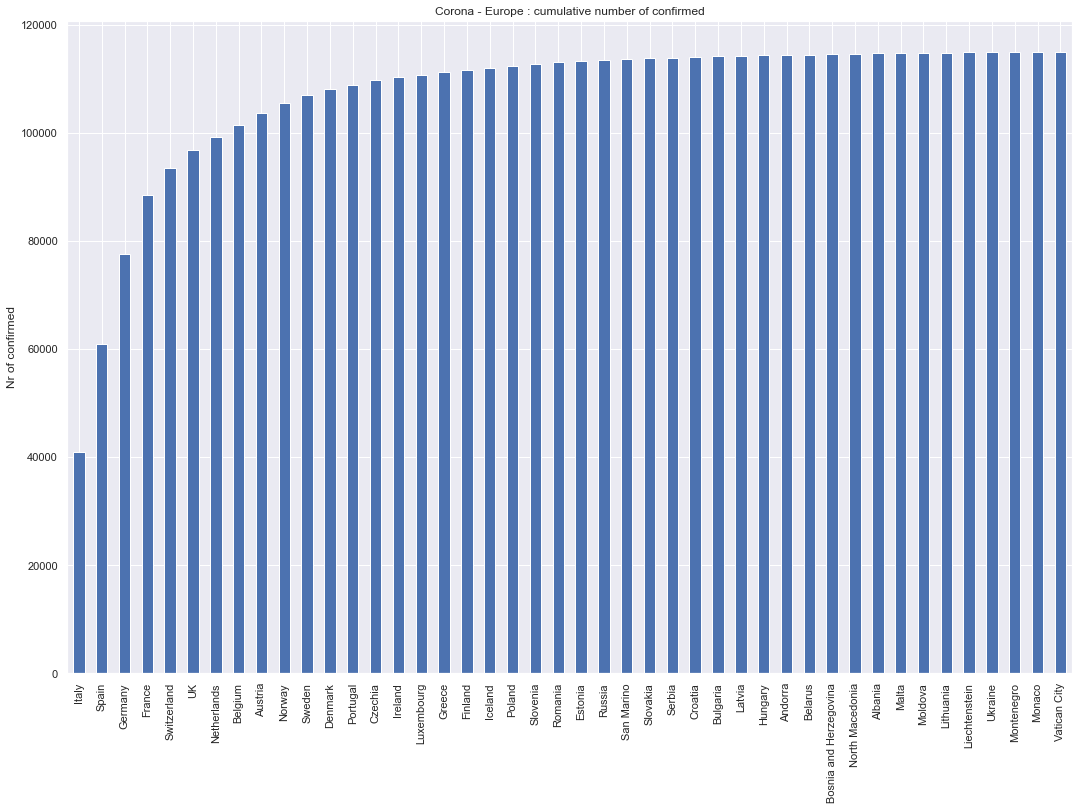

In [176]:
plt.figure(figsize=(18,12))
europe['confirmed'].cumsum().plot(kind='bar')
plt.title('Corona - Europe : cumulative number of confirmed')
plt.ylabel('Nr of confirmed')
plt.savefig('Corona_europe_cumulative.jpg',format='jpg')


In [177]:
def standardize(x):
    return (x - x.mean()) / x.std()

min_confirmed = 100
max_confirmed = 100000 # exclude e.g. China for better view

df_no_extrems = df.loc[ ( ( df['confirmed'] > min_confirmed  ) & ( df['confirmed'] < max_confirmed )) ]
df_no_extrems = df_no_extrems.loc[df_no_extrems['factor'] > 0]
df_no_extrems = df_no_extrems.loc[( 
    ( df_no_extrems['confirmed'] >= min_confirmed ) & (df_no_extrems['confirmed'] <= max_confirmed))]

x = df_no_extrems['confirmed_per_M']
x = standardize(x)
y = df_no_extrems['factor']
y = standardize(y)

In [178]:
# 

slope,intercept,_,_,_ = sps.linregress(x,y)

alpha_mu = 0
alpha_sigma = 1
beta_mu = 0
beta_sigma = 1


alpha = pm.Normal('alpha',mu=alpha_mu,tau = 1 / alpha_sigma ** 2)
beta = pm.Normal('beta',mu=beta_mu,tau = 1 / beta_sigma ** 2)

# by changing sigma from uniform to lognormal, the y-range of sample plot below
# shrunk a lot

sigma = pm.Uniform('sigma',lower=0,upper=10)

@pm.deterministic()
def linreq_mu(x=x,beta=beta,alpha=alpha):
    return x * beta + alpha

likelihood  = pm.Normal('likelihood',mu=linreq_mu,tau= 1 / sigma ** 2,
                       observed=True,value=y)

model = pm.Model([alpha,beta,sigma,linreq_mu,likelihood])
map_ = pm.MAP(model)
map_.fit()

mcmc = pm.MCMC(model)

mcmc.sample(100000,50000,2)

alpha_samples = mcmc.trace('alpha')[:]
beta_samples = mcmc.trace('beta')[:]
sigma_samples = mcmc.trace('sigma')[:]
linreq_mu_samples = mcmc.trace('sigma')[:]

result = pd.DataFrame({'alpha_post': alpha_samples,
                     'beta_post' : beta_samples,
                     'sigma_post' : sigma_samples,
                     'linreq_mu_post' : linreq_mu_samples})


 [-----------------100%-----------------] 100000 of 100000 complete in 109.1 sec

,alpha_post,beta_post,sigma_post,linreq_mu_post
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.001144,0.253846,1.008230,1.008230
std,0.151425,0.155007,0.117074,0.117074
min,-0.630216,-0.388554,0.657420,0.657420
25%,-0.098683,0.148891,0.924811,0.924811
50%,0.000031,0.254816,0.997277,0.997277
75%,0.100563,0.355359,1.080544,1.080544
max,0.669877,0.927889,1.616114,1.616114


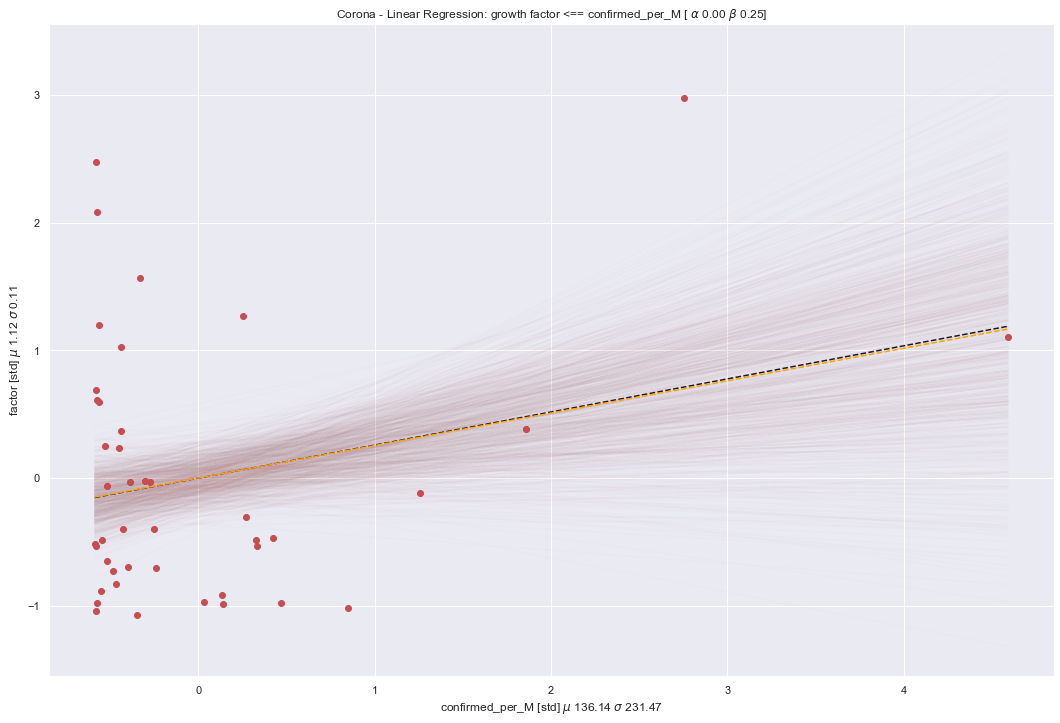

In [179]:

nr_rows = 100
nr_samples = 1000

alphas = np.random.choice(result['alpha_post'],replace=True,size=nr_samples)
betas = np.random.choice(result['beta_post'],replace=True,size=nr_samples)

X = np.linspace(x.min(),x.max(),nr_rows)

line_ys = np.array([X[i] * betas + alphas for i in range(len(X))])

plt.figure(figsize=(18,12))

line_alpha = result['alpha_post'].mean()
line_beta = result['beta_post'].mean()

plt.title(r'Corona - Linear Regression: growth factor <== confirmed_per_M [ $\alpha$ {:.2f} $\beta$ {:.2f}]'.format(
                                                                                        line_alpha,line_beta))

plt.ylabel(r'factor [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['factor'].mean(),
                                                              df_no_extrems['factor'].std()))
plt.xlabel(r'confirmed_per_M [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['confirmed_per_M'].mean(),
                                                             df_no_extrems['confirmed_per_M'].std()))
plt.scatter(x,y,color='r')
plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],color='k',ls='dashed')
plt.plot(X,line_ys,color='r',alpha = 0.01)
plt.plot(X,[X[i] * result['beta_post'].mean() + result['alpha_post'].mean() for i in range(len(X))],
        color='orange',ls='dashed')
result.describe()


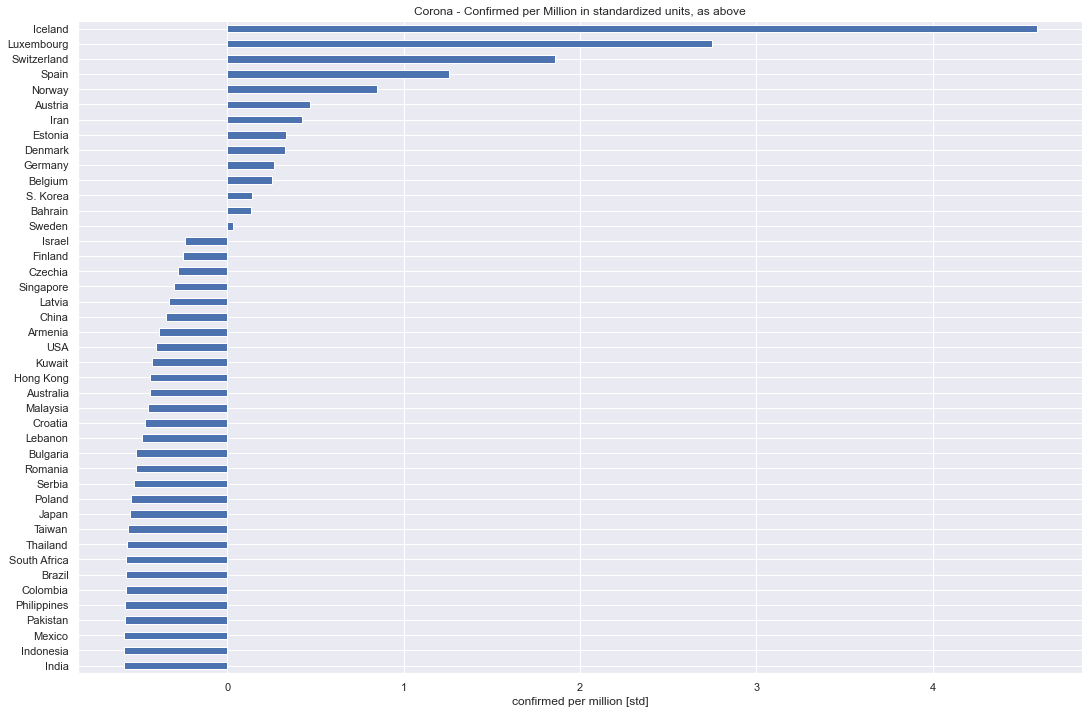

In [180]:
plt.figure(figsize=(18,12))
plt.title ('Corona - Confirmed per Million in standardized units, as above')
plt.xlabel('confirmed per million [std]')
#df_no_extrems['confirmed_per_M'].sort_values().plot(kind='barh')
std_values = standardize(df_no_extrems['confirmed_per_M'])
_= std_values.sort_values().plot(kind='barh')

